<a href="https://colab.research.google.com/github/jamesdvance/BraceYourself/blob/main/FastSAM_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! git clone https://github.com/CASIA-IVA-Lab/FastSAM.git

Cloning into 'FastSAM'...
remote: Enumerating objects: 1171, done.
remote: Counting objects: 100% (242/242), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 1171 (delta 201), reused 186 (delta 186), pack-reused 929
Receiving objects: 100% (1171/1171), 72.45 MiB | 41.70 MiB/s, done.
Resolving deltas: 100% (456/456), done.


In [3]:
! wget https://huggingface.co/spaces/An-619/FastSAM/resolve/main/weights/FastSAM.pt

--2023-10-22 12:40:53--  https://huggingface.co/spaces/An-619/FastSAM/resolve/main/weights/FastSAM.pt
Resolving huggingface.co (huggingface.co)... 65.8.178.12, 65.8.178.27, 65.8.178.93, ...
Connecting to huggingface.co (huggingface.co)|65.8.178.12|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/71/c3/71c3ec5a83f3fc374665cec9240f614262e29088fca1a18732571e13c7084f1b/c0be4e7ddbe4c15333d15a859c676d053c486d0a746a3be6a7a9790d52a9b6d7?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27FastSAM.pt%3B+filename%3D%22FastSAM.pt%22%3B&Expires=1698237653&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTY5ODIzNzY1M319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy83MS9jMy83MWMzZWM1YTgzZjNmYzM3NDY2NWNlYzkyNDBmNjE0MjYyZTI5MDg4ZmNhMWExODczMjU3MWUxM2M3MDg0ZjFiL2MwYmU0ZTdkZGJlNGMxNTMzM2QxNWE4NTljNjc2ZDA1M2M0ODZkMGE3NDZhM2JlNmE3YTk3OTBkNTJhOWI2ZDc%7EcmVzcG9uc2UtY29ud

In [22]:
! pip install -r FastSAM/requirements.txt
! pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-81hqu6nw
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-81hqu6nw
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.1 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369497 sha256=ac9855fd3feb615b7162a8f6d260ae4fede789099ff90b10fe798db89b45b356
  Stored in directory: /tmp/pip-ephem-wheel-cache-b86q03x1/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [5]:
import matplotlib.pyplot as plt
import cv2

In [14]:
from PIL import Image
img1 = Image.open("drive/MyDrive/braces_and_teeth/teeth2/train/2001.png")

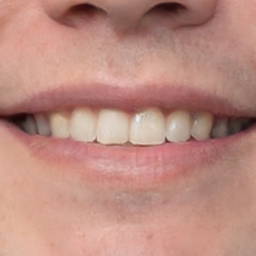

In [15]:
img1

In [16]:
img1_cv = cv2.imread("drive/MyDrive/braces_and_teeth/teeth2/train/2001.png")
img1_cv = cv2.cvtColor(img1_cv, cv2.COLOR_BGR2RGB)

256 256


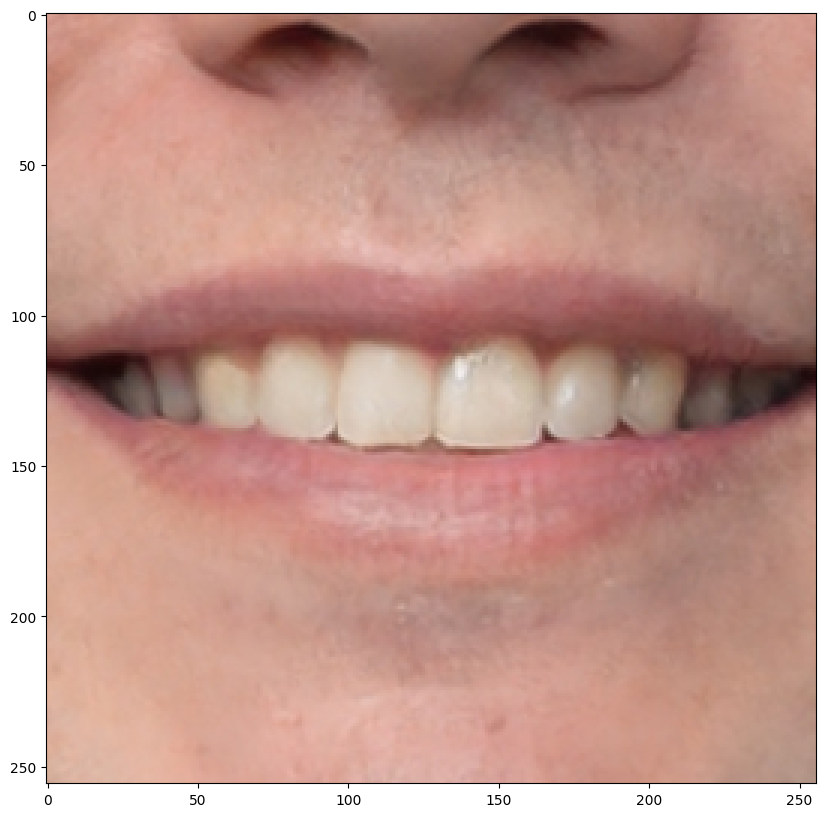

In [17]:
orig_h = img1_cv.shape[0]
orig_w = img1_cv.shape[1]
print(orig_w, orig_h)
plt.figure(figsize=(10,10))
plt.imshow(img1_cv)

In [23]:
!python FastSAM/Inference.py --model_path FastSAM.pt --img_path ./drive/MyDrive/braces_and_teeth/teeth2/train/2001.png --imgsz 256


0: 256x256 8 objects, 1214.2ms
Speed: 6.1ms preprocess, 1214.2ms inference, 53.5ms postprocess per image at shape (1, 3, 256, 256)


In [24]:
segd_img = cv2.imread("output/2001.png")

In [25]:
segd_img = cv2.cvtColor(segd_img, cv2.COLOR_BGR2RGB)

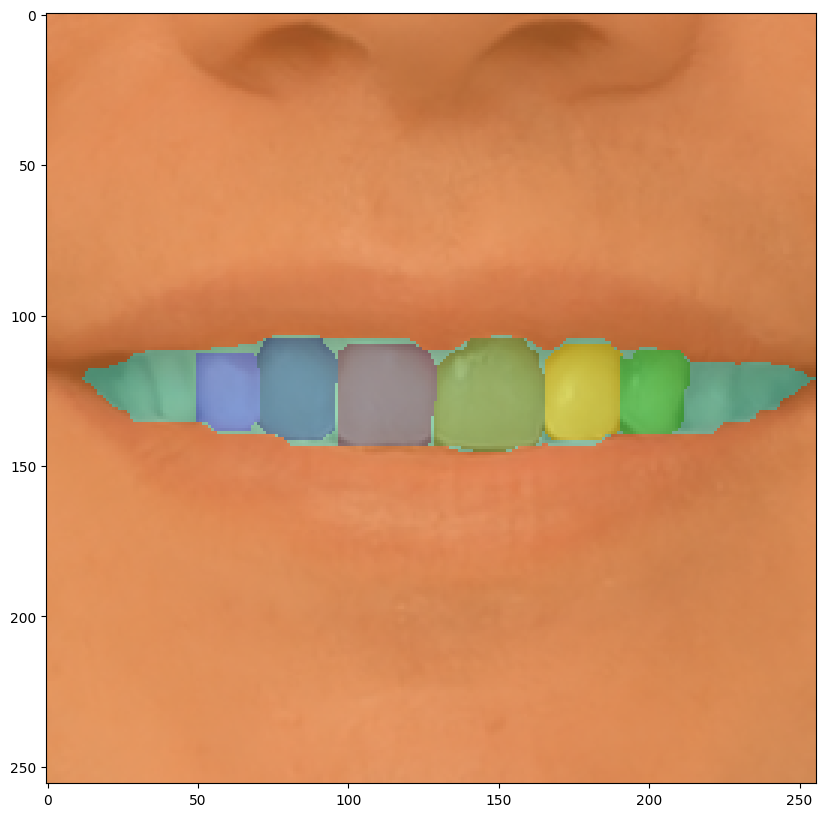

In [27]:
plt.figure(figsize=(10,10))
plt.imshow(segd_img )